In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor


In [47]:
diabetes_dataset = sklearn.datasets.load_diabetes()
print(diabetes_dataset)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [48]:
diabetes_dataframe = pd.DataFrame(diabetes_dataset.data, columns=diabetes_dataset.feature_names)
diabetes_dataframe.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [49]:
#house_price_dataframe['Price'] = house_price_dataset.target
#house_price_dataframe.head()

In [50]:
diabetes_dataframe.shape

(442, 10)

In [51]:
diabetes_dataframe.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [52]:
diabetes_dataframe.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


<Axes: >

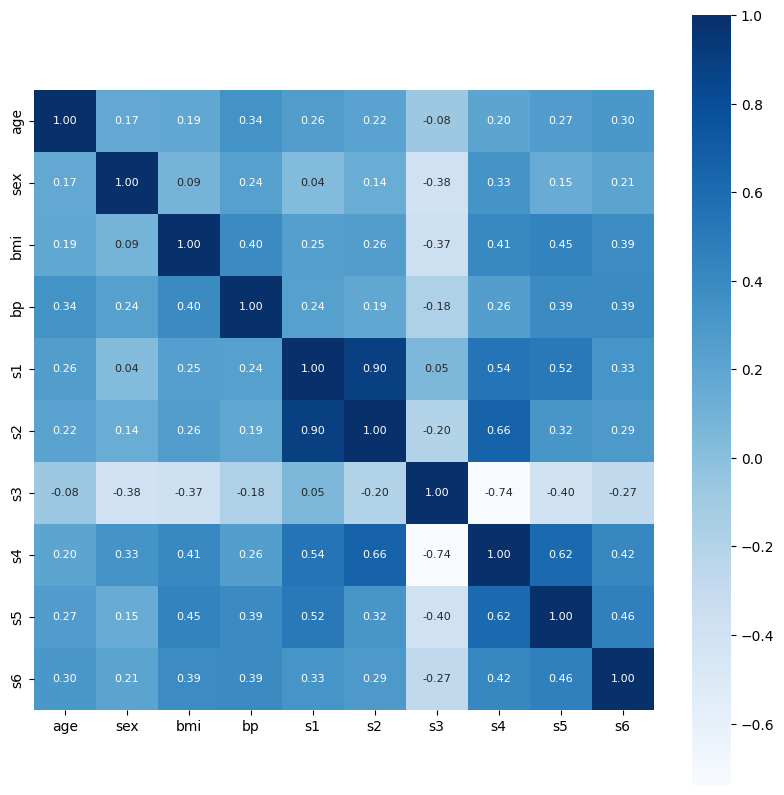

In [53]:
correlation = diabetes_dataframe.corr()

# make a heat map

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [54]:
X = diabetes_dataframe.drop(['bmi'], axis=1)
Y = diabetes_dataframe['bmi']
print(X)
print(Y)

          age       sex        bp        s1        s2        s3        s4  \
0    0.038076  0.050680  0.021872 -0.044223 -0.034821 -0.043401 -0.002592   
1   -0.001882 -0.044642 -0.026328 -0.008449 -0.019163  0.074412 -0.039493   
2    0.085299  0.050680 -0.005670 -0.045599 -0.034194 -0.032356 -0.002592   
3   -0.089063 -0.044642 -0.036656  0.012191  0.024991 -0.036038  0.034309   
4    0.005383 -0.044642  0.021872  0.003935  0.015596  0.008142 -0.002592   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.059744 -0.005697 -0.002566 -0.028674 -0.002592   
438 -0.005515  0.050680 -0.067642  0.049341  0.079165 -0.028674  0.034309   
439  0.041708  0.050680  0.017293 -0.037344 -0.013840 -0.024993 -0.011080   
440 -0.045472 -0.044642  0.001215  0.016318  0.015283 -0.028674  0.026560   
441 -0.045472 -0.044642 -0.081413  0.083740  0.027809  0.173816 -0.039493   

           s5        s6  
0    0.019907 -0.017646  
1   -0.068332 -0.092204

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(442, 9) (353, 9) (89, 9)


In [56]:
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [57]:
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[-0.06995756  0.00871207 -0.01977824  0.04404498 -0.05520516 -0.00946235
  0.1668466   0.01889809  0.04233252  0.04269055  0.00576927 -0.0285531
 -0.00447268 -0.08374262  0.03582528 -0.00821917  0.01265007 -0.03015775
 -0.01851928  0.00366652 -0.03282362  0.03474935 -0.05425678  0.1005298
  0.01600992 -0.03078277 -0.04051912 -0.0678203  -0.00350742 -0.00595192
 -0.06355793  0.03339126  0.15744779 -0.01403387  0.05964373  0.12768014
  0.04599014 -0.03313521 -0.05792511 -0.01226262 -0.0805843  -0.02400736
 -0.05806293 -0.01676566 -0.03389543 -0.06238979 -0.0255473  -0.01236037
 -0.01163684  0.01903453  0.03180997  0.12281793  0.0309525  -0.00615614
 -0.03793783 -0.03687092  0.02821938 -0.03022623 -0.00018332 -0.0604906
  0.0591798  -0.07633031  0.05773715 -0.08783508  0.07063031  0.00130881
  0.04533597 -0.03976486 -0.07093343 -0.03104172 -0.04644287 -0.06224248
  0.09444472 -0.02277331  0.02086763 -0.02529097 -0.06178183  0.02962009
 -0.04453299 -0.03678067  0.09477931  0.05082331  0.04

In [58]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print('R squared error : ', score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.999317373896929
Mean Absolute Error :  0.0008716093899601564


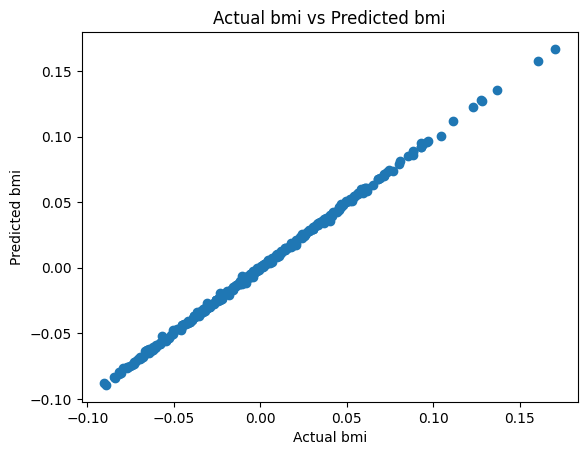

In [59]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual bmi')
plt.ylabel('Predicted bmi')
plt.title('Actual bmi vs Predicted bmi')
plt.show()

In [60]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[-9.84860025e-03  2.38827355e-02 -7.05482718e-03 -5.26447371e-02
  3.18641476e-02 -2.02228245e-03 -2.73290966e-02  6.68780645e-03
 -4.73996326e-02  3.38769844e-03  4.19218466e-02  1.11768377e-05
  9.12202580e-04  1.36654004e-02  3.29290107e-02 -4.49356325e-02
  1.84091441e-02  4.48733717e-02 -4.58022172e-04  1.03708487e-02
 -4.22541760e-02  8.27559829e-02 -8.80456343e-03  2.14214772e-02
 -4.45967652e-02  1.00551426e-01  2.40352470e-02 -4.20800783e-02
 -5.07016107e-02  1.65177565e-02  1.00500792e-01 -1.92922782e-02
 -2.27545612e-02  1.46113755e-02  1.29904389e-01  4.17619832e-02
 -1.11109600e-03  3.31988782e-02 -5.56871109e-02  7.46704713e-02
 -1.55001851e-02 -1.84794962e-02  3.20251100e-02  3.96264419e-02
 -2.03499012e-02 -1.23188607e-02 -2.59445468e-03  4.38393727e-02
 -1.06342370e-02  2.57926937e-02  5.04870191e-02 -6.36510178e-02
 -3.34372781e-02  2.93092579e-02  4.08032909e-02  1.00307465e-02
  6.45497954e-03 -7.25901052e-02  3.85097340e-02 -3.12355217e-02
 -3.59345373e-04  3.26745

In [61]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print('R squared error : ', score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  -0.04578999019446961
Mean Absolute Error :  0.03925617535280468


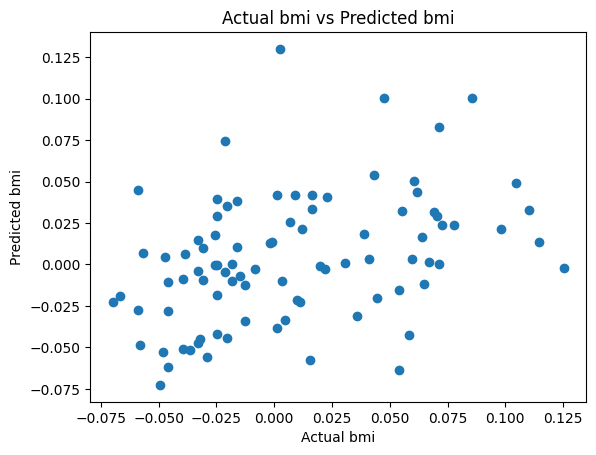

In [62]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual bmi')
plt.ylabel('Predicted bmi')
plt.title('Actual bmi vs Predicted bmi')
plt.show()